# <span style = "color:green"> Twitter Sentiment Analysis </span>

***

Sentiment analysis refers to identifying as well as classifying the sentiments that are expressed in the text source. Tweets are often useful in generating a vast amount of sentiment data upon analysis. These data are useful in understanding the opinion of the people about a variety of topics.

Therefore we need to develop an Automated Machine Learning Sentiment analysis Model in order to compute the customer perception. Due to the presence of non-useful characters (collectively termed as the noise) along with useful data, it becomes difficult to implement models on them.

Here, We aim to analyze the sentiment of the tweets provided in the dataset by developing a machine learning pipeline involving the use of SVM classifier along with using Term Frequency-Inverse Document Frequency(TF-IDF). 

The dataset consist of 13870 tweets that have been extracted using the Twitter API. The dataset contains various columns but for this specific problem, we would only be using
   * Sentiment - Positive, Negative, Neutral
   * Text - Tweet

## Let's get Started

### Import Necessay Libraries

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Read the dataset

In [122]:
df = pd.read_csv("twitter_training.csv",names=['ID','topic','sentiment','text'])

### View head

In [123]:
df.head()

,ID,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


### View info of the dataset

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   topic      74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


### Drop all columns exept 'text' and 'sentiment'

In [125]:
df.columns

Index(['ID', 'topic', 'sentiment', 'text'], dtype='object')

In [126]:
df.drop(columns=['ID','topic'], inplace=True)

In [127]:
df.columns

Index(['sentiment', 'text'], dtype='object')

In [128]:
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


### Check all the unique values in Sentiment

In [129]:
df['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [130]:
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [131]:
df = df[df['sentiment'] != 'Irrelevant']

In [132]:
df['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

### Convert Neutral to 0, Positive to 1 , Negative to -1 

In [133]:
def convert_sentiment(text):
    if text == 'Positive':
        return 1
    elif text == 'Neutral':
        return 0
    else:
        return -1
    

In [134]:
df['sentiment'] = df['sentiment'].apply(convert_sentiment)

In [135]:
df.head()

,sentiment,text
0,1,im getting on borderlands and i will murder yo...
1,1,I am coming to the borders and I will kill you...
2,1,im getting on borderlands and i will kill you ...
3,1,im coming on borderlands and i will murder you...
4,1,im getting on borderlands 2 and i will murder ...


In [136]:
df.tail()

,sentiment,text
74677,1,Just realized that the Windows partition of my...
74678,1,Just realized that my Mac window partition is ...
74679,1,Just realized the windows partition of my Mac ...
74680,1,Just realized between the windows partition of...
74681,1,Just like the windows partition of my Mac is l...


In [137]:
df['sentiment'].unique()

array([ 1,  0, -1])

### Check for missing values

In [138]:
df.isna().sum()

sentiment      0
text         571
dtype: int64

In [139]:
df.dropna(inplace=True)

In [140]:
df.isna().sum()

sentiment    0
text         0
dtype: int64

### Check for Duplicates

In [141]:
df.duplicated().sum()

np.int64(3636)

### Drop duplicate rows

In [142]:
df = df.drop_duplicates()

In [143]:
df.duplicated().sum()

np.int64(0)

### View some of the tweets

In [144]:
for i in range(10):
    print(df['text'][i])

im getting on borderlands and i will murder you all ,
I am coming to the borders and I will kill you all,
im getting on borderlands and i will kill you all,
im coming on borderlands and i will murder you all,
im getting on borderlands 2 and i will murder you me all,
im getting into borderlands and i can murder you all,
So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg
So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Here's the original picture compared to the creation I made:) Have fun! pic.twitter.com / mLsI5wf9Jg
So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan a

### Exploratory Data Analysis

### Plot a countplot of sentiment

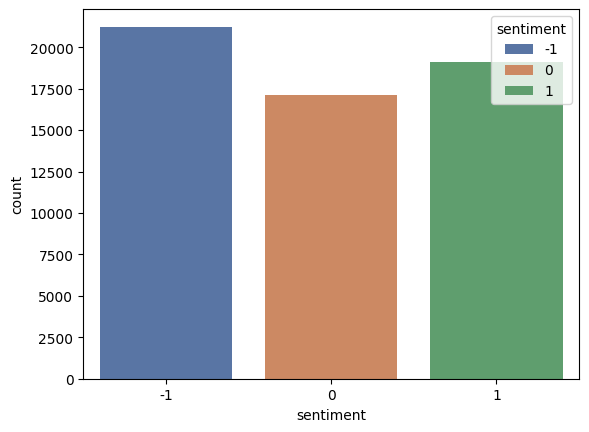

In [145]:
sns.countplot(x= df['sentiment'], hue= df['sentiment'] , palette= 'deep')
plt.show()

### Plot a piechart to show the percentile representation of sentiments

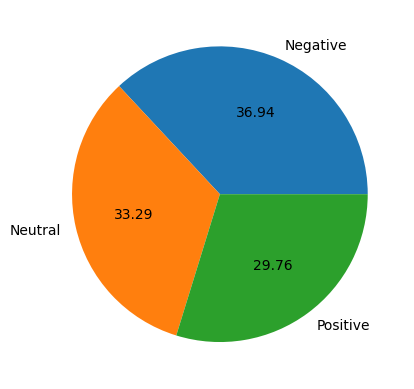

In [146]:
plt.pie(df['sentiment'].value_counts(), labels = ['Negative', 'Neutral','Positive'], autopct = '%0.2f')
plt.show()

### Define a function that preprocess the tweets

ie, 
* Remove all special characters
* Remove any stopwords
* Lemmatize the words

In [147]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [148]:
def preprocess(sentence):
    text = re.sub(r'[^0-9a-zA-Z]+',' ',sentence).split()
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    
    word = ' '.join(word)
    return word

### Apply the function to our tweets column

In [149]:
df['text'] = df['text'].apply(preprocess)

### Print some of the tweets after preprocessing

In [150]:
for i in range(10):
    print(df['text'][i])

im get borderlands murder
i come border i kill
im get borderlands kill
im come borderlands murder
im get borderlands 2 murder
im get borderlands murder
so i spend hours make something fun if know i huge borderlands fan maya one favorite character so i decide make wallpaper pc here original image versus creation i make enjoy pic twitter com mlsi5wf9jg
so i spend couple hours something fun if know i huge borderlands fan maya one favorite character i decide make wallpaper pc here original picture compare creation i make have fun pic twitter com mlsi5wf9jg
so i spend hours something fun if know i huge borderlands fan maya one favorite character
so i spend hours make something fun if know i huge rhandlerr fan maya one favorite character so i decide make wallpaper pc here original image versus creation i make enjoy pic twitter com mlsi5wf9jg


### Assign X and y variables

In [151]:
X = df['text']
y = df['sentiment']

In [152]:
X

0                                im get borderlands murder
1                                     i come border i kill
2                                  im get borderlands kill
3                               im come borderlands murder
4                              im get borderlands 2 murder
                               ...                        
74677    just realize windows partition mac like 6 year...
74678    just realize mac window partition 6 years behi...
74679    just realize windows partition mac 6 years beh...
74680    just realize windows partition mac like 6 year...
74681    just like windows partition mac like 6 years b...
Name: text, Length: 57485, dtype: object

### Transform X variable(tweets) using TF-IDF Vectorizer

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [154]:
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),  
    max_features=10000,  
    min_df=2,            
    max_df=0.8           
)

In [155]:
X = vectorizer.fit_transform(X)

In [156]:
type(X)

scipy.sparse._csr.csr_matrix

### Split the data into training and testing set

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

### Check the shape of X_train and X_test

In [159]:
X_train.shape

(40239, 10000)

In [160]:
X_test.shape

(17246, 10000)

### Create a SVM Model

## Create a Random Forest Model

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV



In [162]:
rfc = RandomForestClassifier(random_state=42)

### Random search CV


In [163]:
param_dist = {
    'n_estimators': [100, 150],           # Fewer options
    'max_depth': [20, 30],                # Fewer options
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2],
    'max_features': ['sqrt']              # Use sqrt of features
}

In [164]:
random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=5,                # Reduce from 20 to 5
    cv=3,                    # Reduce from 5-fold to 3-fold
    n_jobs=-1,
    verbose=2,
    scoring='accuracy',
    random_state=42
)

### Train the models

In [165]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    solver='saga',           # Fast solver for sparse data
    max_iter=100,
    n_jobs=-1,
    random_state=42
)
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


In [167]:
import pickle 
with open("sentiment.pkl",'wb') as f:
    pickle.dump(lr,f)

In [168]:
with open("vectorizer.pkl",'wb') as f:
    pickle.dump(vectorizer,f)

### Score and best parameters

### Check the score of the training set

In [171]:
lr.score(X_train,y_train)

0.8631675737468625

### Make prediction with X_test

In [173]:
rfc_y_pred = lr.predict(X_test)
rfc_y_pred

array([0, 0, 1, ..., 1, 1, 1], shape=(17246,))

### Check the accuracy of our prediction

In [174]:
from sklearn import metrics

In [176]:
metrics.accuracy_score(rfc_y_pred,y_test)

0.8068537631914647

### Plot confusion matrix on heatmap

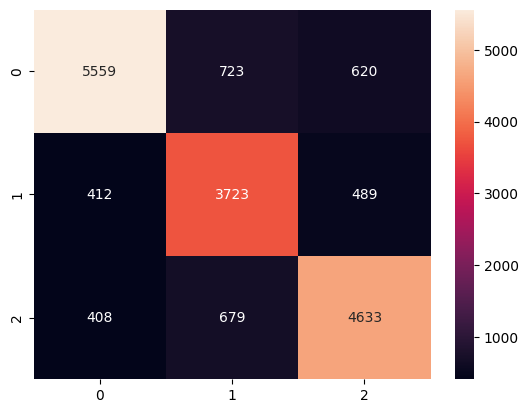

In [178]:
sns.heatmap(metrics.confusion_matrix(rfc_y_pred,y_test),annot=True,fmt='d')
plt.show()

### Print Classification report

In [180]:
print(metrics.classification_report(rfc_y_pred,y_test))

              precision    recall  f1-score   support

          -1       0.87      0.81      0.84      6902
           0       0.73      0.81      0.76      4624
           1       0.81      0.81      0.81      5720

    accuracy                           0.81     17246
   macro avg       0.80      0.81      0.80     17246
weighted avg       0.81      0.81      0.81     17246



***

# <center><a href = "http://edure.in/"><span style = "color:CornflowerBlue; font-family:Courier New;font-size:40px">EDURE LEARNING</span></a></center>